Number of missing values in age : 0
Number of missing values in anaemia : 0
Number of missing values in creatinine_phosphokinase : 0
Number of missing values in diabetes : 0
Number of missing values in ejection_fraction : 0
Number of missing values in high_blood_pressure : 0
Number of missing values in platelets : 0
Number of missing values in serum_creatinine : 0
Number of missing values in sex : 0
Number of missing values in smoking : 0
Number of missing values in time : 0
Number of missing values in DEATH_EVENT : 0
     anaemia  diabetes  high_blood_pressure  sex  smoking  DEATH_EVENT
0          0         0                    1    1        0            1
1          0         0                    0    1        0            1
2          0         0                    0    1        1            1
3          1         0                    0    1        0            1
4          1         1                    0    0        0            1
..       ...       ...                  ...  ...  

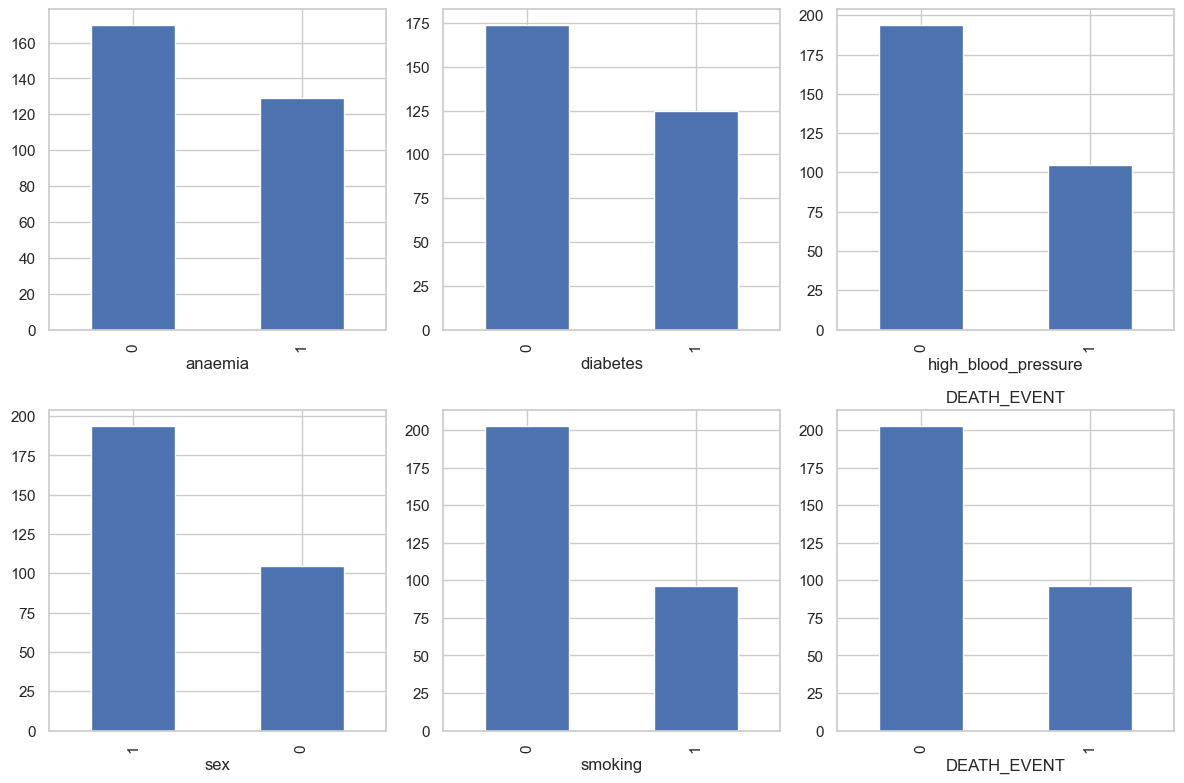

interval columns not set, guessing: ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
                      anaemia  diabetes  high_blood_pressure       sex  \
anaemia              1.000000  0.000000             0.000000  0.103542   
diabetes             0.000000  1.000000             0.000000  0.217098   
high_blood_pressure  0.000000  0.000000             1.000000  0.122762   
sex                  0.103542  0.217098             0.122762  1.000000   
smoking              0.128123  0.199117             0.000000  0.631702   
DEATH_EVENT          0.018687  0.000000             0.067031  0.000000   

                      smoking  DEATH_EVENT  
anaemia              0.128123     0.018687  
diabetes             0.199117     0.000000  
high_blood_pressure  0.000000     0.067031  
sex                  0.631702     0.000000  
smoking              1.000000     0.000000  
DEATH_EVENT          0.000000     1.000000  


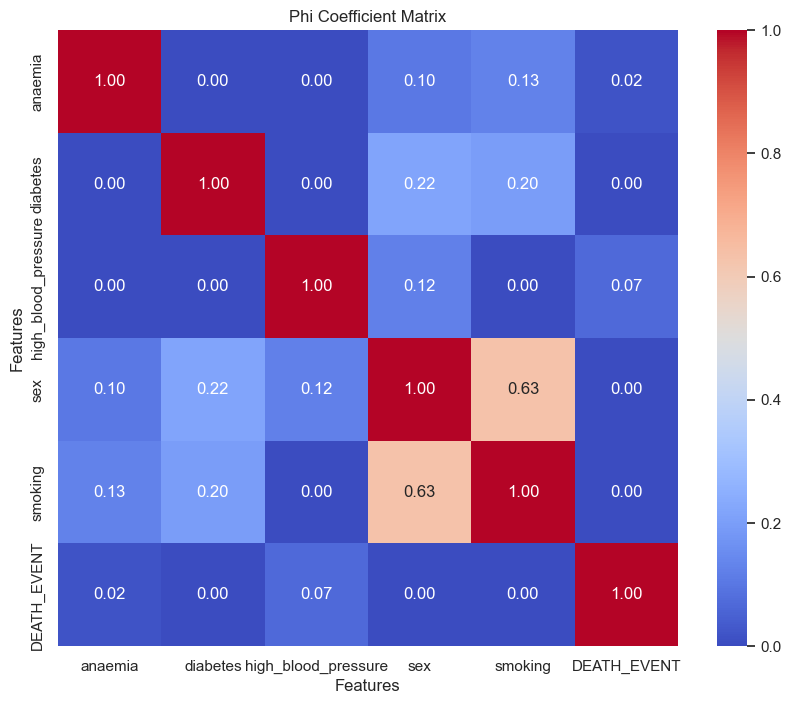

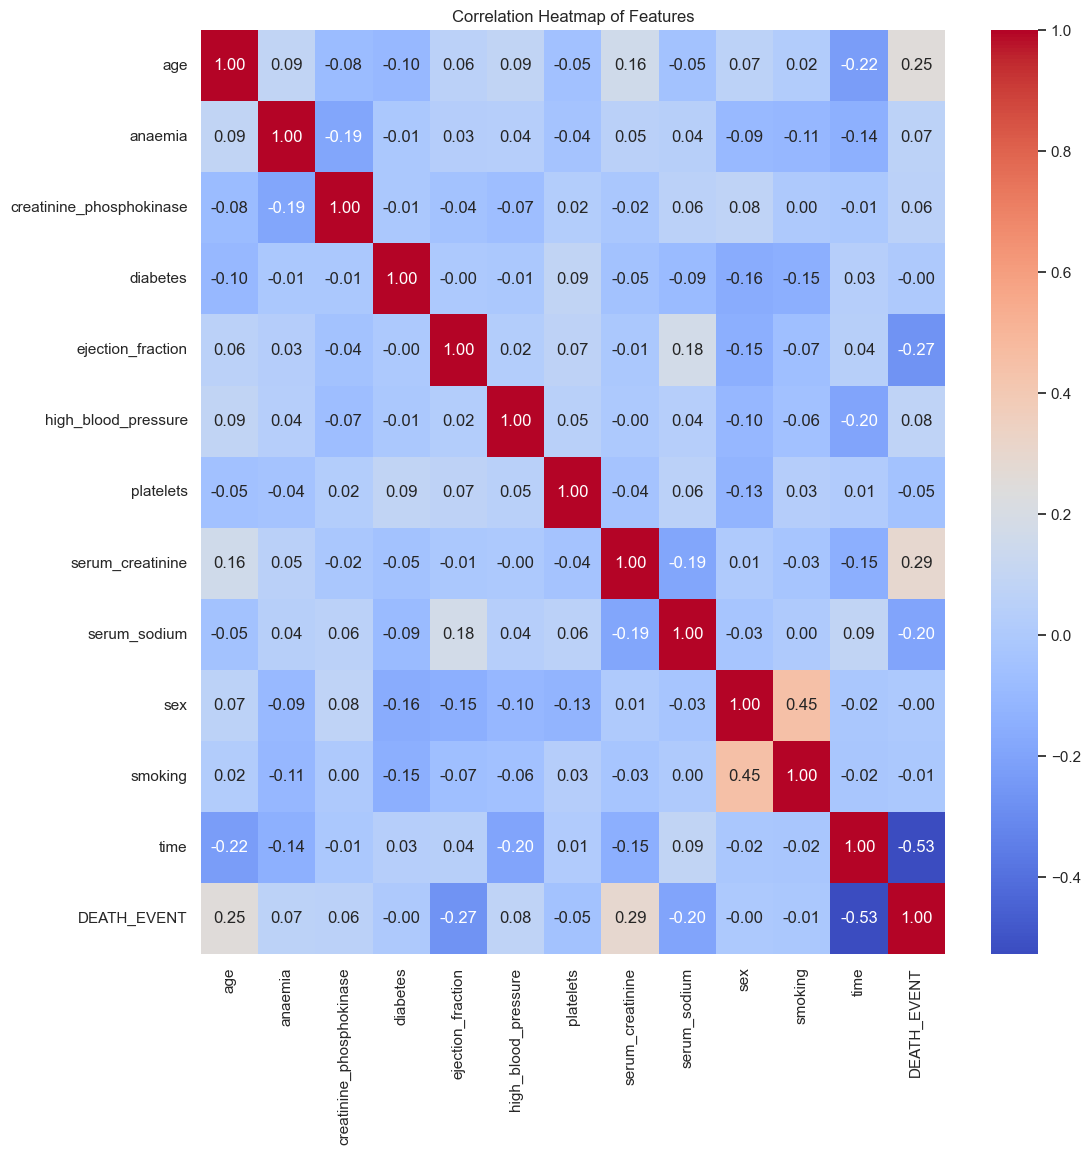

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
from phik import phik_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

#Missing Value Detection
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'sex', 'smoking', 'time', 'DEATH_EVENT' ]

for feature in features:
    missing_values_count = data[feature].isnull().sum()
    print("Number of missing values in", feature, ":", missing_values_count)

binary_columns = []
for column in data.columns: 
    if len(data[column].unique())==2: 
        binary_columns.append(column)

binary_dataset = data[binary_columns]
print(binary_dataset)

fig, axes = plt.subplots(2, 3, figsize=(12,8))

axes = axes.flatten()

for i, column in enumerate(binary_dataset.columns):
    binary_dataset[column].value_counts().plot(kind='bar', ax=axes[i])

axes[i].set_title(column)
plt.tight_layout()
plt.show()

phi_matrix = phik_matrix(binary_dataset)
print(phi_matrix)

plt.figure(figsize=(10,8))
sns.heatmap(phi_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Phi Coefficient Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

Logistics Regression Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.77        60
weighted avg       0.83      0.80      0.79        60

Logistics Regression Confusion Matrix:
[[34  1]
 [11 14]]


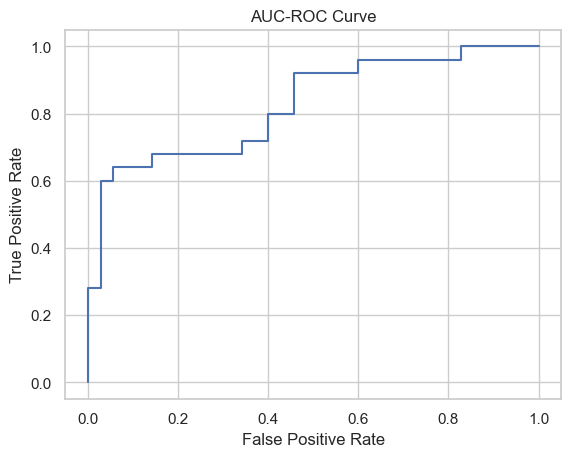

In [49]:
#Specifying predictor & predicting features
x = data.drop(columns=['DEATH_EVENT'])
y = data['DEATH_EVENT']

#Standardization
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)
y_train = y_train.reset_index(drop=True)

#Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

# Predictions on the test set
y_pred = logistic_model.predict(x_test)

# Logistics Regression Classification Report & Confusion Matrix
print("Logistics Regression Classification Report:")
print(classification_report(y_test, y_pred))
print("Logistics Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Logistic Regression AUC-ROC Curve
y_prob = logistic_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.show()


<>:63: SyntaxWarning: invalid escape sequence '\e'
<>:63: SyntaxWarning: invalid escape sequence '\e'
C:\Users\abdif\AppData\Local\Temp\ipykernel_14612\1728223781.py:63: SyntaxWarning: invalid escape sequence '\e'
  ax.set_title('$\eta$ =' +str(learning_rate)+' , batch = ' +str(batch_size))


[1]
[0.64523423]


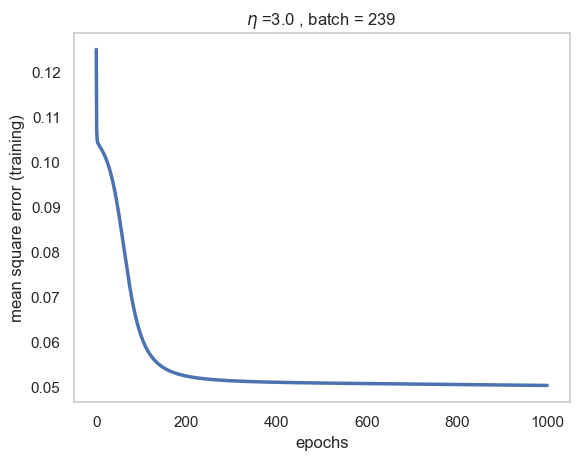

In [50]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))
def dsigmoid(x):
    return sigmoid(x)*(1.0-sigmoid(x))

num_input_neurons = data.shape[1] -1 
num_hidden_neurons = 10
num_output_neurons = 1

learning_rate = 3.0
epochs_number = 1000
batch_size = x_train.shape[0]

training_error = np.zeros((epochs_number))

weights_hidden = np.zeros((num_hidden_neurons, num_input_neurons))
bias_hidden = np.zeros(num_hidden_neurons)
weights_output = np.zeros((num_output_neurons, num_hidden_neurons))
bias_output = np.zeros(num_output_neurons)

for i in range(epochs_number):
    epoch_error = 0 
    change_weights_hidden = np.zeros(weights_hidden.shape)
    change_bias_hidden = np.zeros(bias_hidden.shape)
    change_weights_output = np.zeros(weights_output.shape)
    change_bias_output = np.zeros(bias_output.shape)

    # Iterate over the batch
    for j in range(batch_size):
        #Feedforward
        weighted_sum_hidden = np.dot(weights_hidden, x_train[j]) + bias_hidden
        output_hidden = sigmoid(weighted_sum_hidden)
        weighted_sum_output = np.dot(weights_output, output_hidden ) + bias_output
        network_output = sigmoid(weighted_sum_output)
# Error Calculation
        epoch_error += 0.5*np.sum(np.square(network_output - y_train[j]))

#Backpropagation
        delta_output = (y_train[j]-network_output) * dsigmoid(weighted_sum_output)
        delta_hidden = np.dot(weights_output.T, delta_output)* dsigmoid(weighted_sum_hidden) 
#Change in weight & bias for initial layer
        change_weights_output += learning_rate * np.outer(delta_output, output_hidden )
        change_bias_output += learning_rate * delta_output 
#Change in weights & biases for the hidden layer
        change_weights_hidden += learning_rate * np.outer(delta_hidden, x_train[j])
        change_bias_hidden += learning_rate * delta_hidden
#Update the weights and the bias
    weights_output += change_weights_output/batch_size
    bias_output += change_bias_output/batch_size
#Update the weights & bias for hidden layer
    weights_hidden += change_weights_hidden/batch_size
    bias_hidden += change_bias_hidden/batch_size

#store the error of this epoch
    training_error[i] = epoch_error/batch_size

#Neural Network Training Plot
fig, ax = plt.subplots()
ax.plot(training_error, linewidth=2.5)
ax.grid()
ax.set_xlabel('epochs')
ax.set_ylabel('mean square error (training)')
ax.set_title('$\eta$ =' +str(learning_rate)+' , batch = ' +str(batch_size))   

predictions = (network_output>0.5).astype(int)
print(predictions)
print(network_output)

In [51]:
#Random Initialisation was used for a prior neural network which outputted worse results
weights_input_hidden = np.random.rand(num_hidden_neurons, num_input_neurons)
bias_hidden = np.random.rand(num_hidden_neurons)
weights_hidden_output = np.random.rand(num_output_neurons, num_hidden_neurons)
bias_output = np.random.rand(num_output_neurons)

training_error = np.zeros((epochs_number))

In [52]:
# Instantiate the model
model = LogisticRegression()

#5 Fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = 'accuracy'

# Perform cross-validation
cv_results = cross_val_score(model, x_scaled, y, cv=kfold, scoring=scoring)

# Aggregate results
print("Cross-Validation Results:")
print("Mean Accuracy: {:.2f}".format(cv_results.mean()))
print("Standard Deviation: {:.2f}".format(cv_results.std()))

Cross-Validation Results:
Mean Accuracy: 0.82
Standard Deviation: 0.04


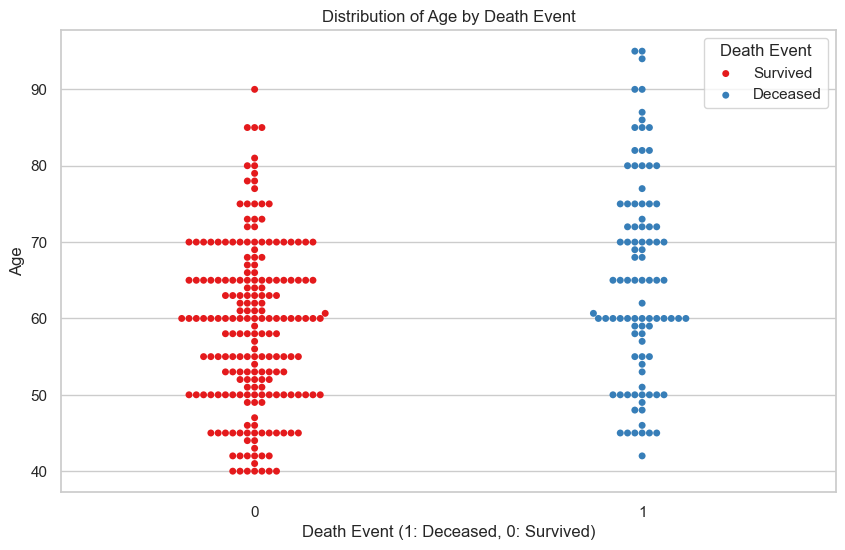

In [53]:
sns.set(style="whitegrid")

# Create the swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='DEATH_EVENT', y='age', data=data, hue='DEATH_EVENT', palette='Set1')
plt.xlabel('Death Event (1: Deceased, 0: Survived)')
plt.ylabel('Age')
plt.title('Distribution of Age by Death Event')
plt.legend(title='Death Event', loc='upper right', labels=['Survived', 'Deceased'])
plt.show()

In [54]:
weights = np.zeros((num_output_neurons, num_input_neurons))
bias = np.zeros((num_output_neurons))

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.77        60
weighted avg       0.83      0.80      0.79        60

Confusion Matrix:
[[34  1]
 [11 14]]


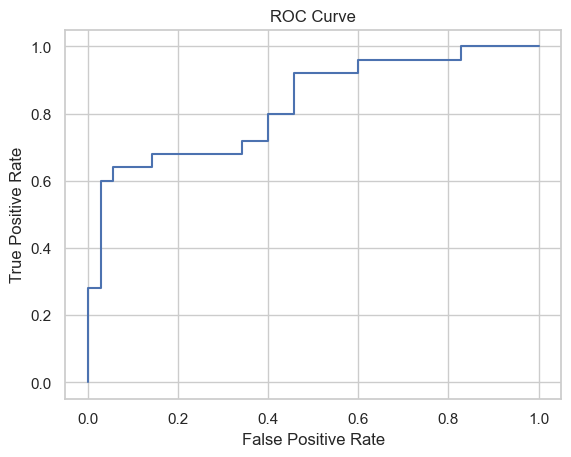

AUC-ROC Score: 0.8251428571428572


In [55]:
# Logistics Regression 2
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(x_test)
y_pred_proba = clf.predict_proba(x_test)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate AUC-ROC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC Score:", auc_score)

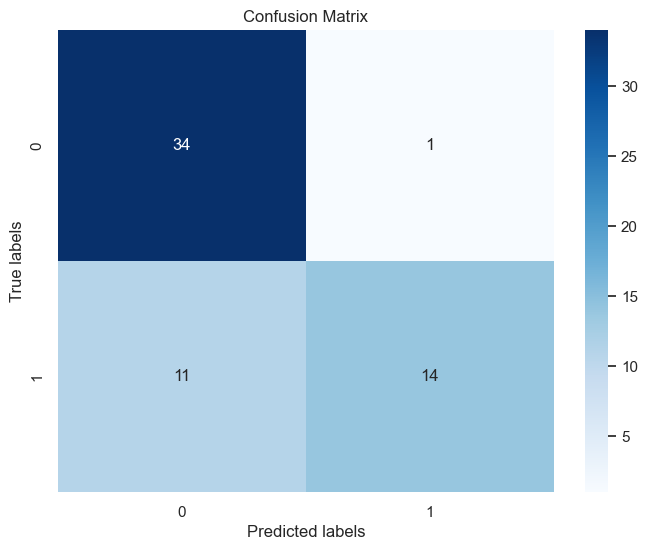

In [56]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
